In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
path = r'Acted Emotional Speech Dynamic Database/anger/a01 (1).wav'

In [3]:
X,sample_rate = librosa.load(path,res_type = 'kaiser_fast')

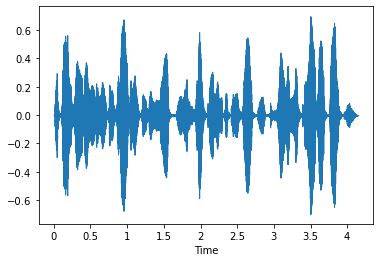

In [4]:
librosa.display.waveshow(X, sr=sample_rate)

In [33]:
path = r'Acted Emotional Speech Dynamic Database/'
list_path = []
for index,name in enumerate(os.listdir(path)):
    folder = os.path.join(path,name)
    for file_class in os.listdir(folder):
        in_folder = os.path.join(folder, file_class)
        list_path.append([in_folder,index])
    print(name,index)

fear 0
sadness 1
happiness 2
anger 3
disgust 4


In [34]:
len(list_path)

604

In [35]:
df = pd.DataFrame(list_path,columns=['Path','label'])

In [36]:
df.head()

,Path,label
0,Acted Emotional Speech Dynamic Database/fear/f...,0
1,Acted Emotional Speech Dynamic Database/fear/f...,0
2,Acted Emotional Speech Dynamic Database/fear/f...,0
3,Acted Emotional Speech Dynamic Database/fear/f...,0
4,Acted Emotional Speech Dynamic Database/fear/f...,0


In [37]:
df['Path'][0]

'Acted Emotional Speech Dynamic Database/fear/f09 (3).wav'

In [38]:
def cal_mfcc(path):
    #print(path)
    X,sample_rate = librosa.load(path,res_type = 'kaiser_fast')
    mfcc_mean = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0)
    mfcc_var = np.var(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0)
    return mfcc_mean,mfcc_var
df['mfcc'] = df['Path'].apply(cal_mfcc)

In [39]:
def cal_melspectrogram(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    melspectrogram_mean = np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate,n_mels=13,hop_length=512).T,axis=0)
    melspectrogram_var = np.var(librosa.feature.melspectrogram(y=X,sr=sample_rate,n_mels=13,hop_length=512).T,axis=0)
    return melspectrogram_mean,melspectrogram_var
df['mel_spect'] = df['Path'].apply(cal_melspectrogram)

In [40]:
def cal_zcr(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    zcr_mean = np.mean(librosa.feature.zero_crossing_rate(X,hop_length=512,center=True))
    zcr_var = np.var(librosa.feature.zero_crossing_rate(X,hop_length=512,center=True))
    return zcr_mean,zcr_var
df['zcr'] = df['Path'].apply(cal_zcr)

In [41]:
def cal_rms(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    rms_mean = np.mean(librosa.feature.rms(y=X,frame_length=2048,hop_length=512,center=True,pad_mode='reflect'))
    rms_var = np.var(librosa.feature.rms(y=X,frame_length=2048,hop_length=512,center=True,pad_mode='reflect'))
    return rms_mean,rms_var
df['rms'] = df['Path'].apply(cal_rms)

In [43]:
def spect_rollof_30(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    spectral_rolloff_30 = np.mean(librosa.feature.spectral_rolloff(y=X,sr=sample_rate,n_fft=2048,hop_length=512,
                                                                roll_percent=0.30))
    return spectral_rolloff_30
df['roll_of_30'] = df['Path'].apply(spect_rollof_30)

In [45]:
def spect_rollof_50(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    spectral_rolloff_50 = np.mean(librosa.feature.spectral_rolloff(y=X,sr=sample_rate,n_fft=2048,hop_length=512,
                                                                roll_percent=0.50))
    return spectral_rolloff_50
df['roll_of_50'] = df['Path'].apply(spect_rollof_50)

In [46]:
def spect_rollof_70(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    spectral_rolloff_70 = np.mean(librosa.feature.spectral_rolloff(y=X,sr=sample_rate,n_fft=2048,hop_length=512,
                                                                roll_percent=0.70))
    return spectral_rolloff_70
df['roll_of_70'] = df['Path'].apply(spect_rollof_70)

In [47]:
def spect_rollof_90(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    spectral_rolloff_90 = np.mean(librosa.feature.spectral_rolloff(y=X,sr=sample_rate,n_fft=2048,hop_length=512,
                                                                roll_percent=0.90))
    return spectral_rolloff_90
df['roll_of_90'] = df['Path'].apply(spect_rollof_90)

In [48]:
def cal_spectral_centroid(path):
        X,sample_rate = librosa.load(path,res_type='kaiser_fast')
        sc = np.mean(librosa.feature.spectral_centroid(y=X,sr=sample_rate,n_fft=2048,
                                                       hop_length=512,freq=None,center=True,pad_mode='reflect'))
        return sc
df['sc'] = df['Path'].apply(cal_spectral_centroid)

In [49]:
def cal_pitch(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    pitch,magnitude = librosa.piptrack(y=X, sr=sample_rate,n_fft=2048, hop_length=512, fmin=150.0, fmax=4000.0,threshold=0.1)
    pitch_f = np.mean(pitch)
    return pitch_f
df['pitch'] = df['Path'].apply(cal_pitch)


In [50]:
def cal_spect_contrast(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    S = np.abs(librosa.stft(X))
    s_contrast =np.var(librosa.feature.spectral_contrast(S=S,sr=sample_rate))
    return s_contrast
df['contrast'] = df['Path'].apply(cal_spect_contrast)


In [52]:
def cal_spect_flatness(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    S,phase = librosa.magphase(librosa.stft(X))
    s_flatness =np.mean(librosa.feature.spectral_flatness(S=S))
    return s_flatness
df['flatness'] = df['Path'].apply(cal_spect_flatness)

In [153]:
def tempo(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    onset_env = librosa.onset.onset_strength(y=X, sr=sample_rate)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sample_rate)
    return np.mean(tempo)
df['tempo'] = df['Path'].apply(tempo)


In [54]:
def croma_(path):
    X,sample_rate = librosa.load(path,res_type='kaiser_fast')
    croma_var =np.var(librosa.feature.chroma_stft(y=X, sr=sample_rate,n_chroma=13).T,axis=0)
    croma_mean =np.mean(librosa.feature.chroma_stft(y=X, sr=sample_rate,n_chroma=13).T,axis=0)
    return croma_mean,croma_var
df['croma'] = df['Path'].apply(croma_)

In [154]:
df.head()

,Path,label,mfcc,mel_spect,zcr,rms,roll_of_30,roll_of_50,roll_of_70,roll_of_90,sc,pitch,contrast,flatness,tempo,croma
0,Acted Emotional Speech Dynamic Database/fear/f...,0,"([-289.79547, 69.2117, -14.844449, -0.9403979,...","([3.355774, 8.293446, 3.7266734, 0.6018763, 0....","(0.1088031089469178, 0.014507598614330293)","(0.061340056, 0.0024339305)",861.696844,1472.664611,2661.341670,5464.640244,2255.163755,20.725584,74.953849,0.015859,123.046875,"([0.40995747, 0.36344633, 0.24571717, 0.214962..."
1,Acted Emotional Speech Dynamic Database/fear/f...,0,"([-244.49379, 47.834312, -36.765747, -19.10926...","([3.381918, 7.2873716, 9.204236, 0.94624305, 1...","(0.11086047535211267, 0.0037492324709537546)","(0.0729905, 0.0025200436)",882.633865,1774.062981,3164.471006,6562.546937,2613.362624,26.604160,75.946830,0.016071,123.046875,"([0.228289, 0.2316915, 0.26258856, 0.33445683,..."
2,Acted Emotional Speech Dynamic Database/fear/f...,0,"([-314.3742, 73.36459, -6.4337473, 27.630636, ...","([6.579507, 7.1101074, 1.9643631, 0.4717576, 0...","(0.12568917410714286, 0.014259051428035815)","(0.05799939, 0.0028432766)",975.761719,1743.235840,2916.703125,5331.928711,2360.061152,26.549549,74.698857,0.027758,151.999081,"([0.4542336, 0.4224731, 0.4303259, 0.4959, 0.5..."
3,Acted Emotional Speech Dynamic Database/fear/f...,0,"([-226.89368, 61.16815, -24.38455, -2.3328295,...","([11.220349, 8.52099, 5.4775696, 3.9233096, 3....","(0.14251910199175824, 0.014771413463366348)","(0.094437934, 0.0023236542)",1205.622746,1942.484225,2984.123347,5483.039739,2509.701460,15.810717,60.172080,0.019989,129.199219,"([0.29740217, 0.37915543, 0.41081008, 0.310606..."
4,Acted Emotional Speech Dynamic Database/fear/f...,0,"([-240.01399, 26.2639, -53.189796, -14.775759,...","([7.812726, 32.53362, 1.9427065, 2.6405957, 4....","(0.13995816814365672, 0.012369264563677122)","(0.11749103, 0.0036474236)",1071.758942,1966.029654,3298.356423,5946.217278,2667.367217,21.201275,85.566494,0.016265,143.554688,"([0.1343753, 0.10724149, 0.10068396, 0.1026706..."


In [56]:
df.to_excel('feat.xlsx')

In [75]:
mfcc_mean = []
mfcc_var = []
for row in df['mfcc']:
    mfcc_mean.append(list(row[0]))
    mfcc_var.append(list(row[1]))

In [78]:
mfcc_feature = ['mfcc_mean_1','mfcc_mean_2','mfcc_mean_3','mfcc_mean_4','mfcc_mean_5','mfcc_mean_6','mfcc_mean_7',
               'mfcc_mean_8','mfcc_mean_9','mfcc_mean_10','mfcc_mean_11','mfcc_mean_12','mfcc_mean_13',]

In [158]:
df_test.head()

,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13
0,-289.795471,69.211700,-14.844449,-0.940398,-6.964106,-7.601765,-36.402203,-4.543336,-32.297504,-15.974521,-23.219419,-4.767803,-12.058653
1,-244.493790,47.834312,-36.765747,-19.109262,-29.387634,-15.237701,-44.394093,-19.686245,-47.325718,-11.892278,-22.570374,0.114160,-23.028452
2,-314.374207,73.364594,-6.433747,27.630636,5.560296,-2.201655,-8.644259,5.580249,-20.027386,7.696247,-11.726632,-1.286848,-4.219403
3,-226.893677,61.168152,-24.384550,-2.332829,-32.250622,-14.733680,-37.349171,-18.004389,-55.923111,-15.494625,-31.573586,-1.631095,-20.848085
4,-240.013992,26.263901,-53.189796,-14.775759,-30.814045,-36.488800,-41.405788,-22.031425,-53.192707,-4.693686,-36.172737,-5.538815,-8.681311


In [121]:
mfcc_feature_var = ['mfcc_var_1','mfcc_var_2','mfcc_var_3','mfcc_var_4','mfcc_var_5','mfcc_var_6','mfcc_var_7',
               'mfcc_var_8','mfcc_var_9','mfcc_var_10','mfcc_var_11','mfcc_var_12','mfcc_var_13',]

In [122]:
df_test_mfcc_var = pd.DataFrame(data=mfcc_var,columns=mfcc_feature_var)

In [85]:
mel_mean = []
mel_var = []
for row in df['mel_spect']:
    mel_mean.append(list(row[0]))
    mel_var.append(list(row[1]))

In [86]:
mel_feature = ['mel_mean_1','mel_mean_2','mel_mean_3','mel_mean_4','mel_mean_5','mel_mean_6','mel_mean_7',
               'mel_mean_8','mel_mean_9','mel_mean_10','mel_mean_11','mel_mean_12','mel_mean_13',]

In [116]:
df_test_mel_mean = pd.DataFrame(data=mel_mean,columns=mel_feature)

In [114]:
mel_feature_var = ['mel_var_1','mel_var_2','mel_var_3','mel_var_4','mel_var_5','mel_var_6','mel_var_7',
               'mel_var_8','mel_var_9','mel_var_10','mel_var_11','mel_var_12','mel_var_13',]

In [119]:
df_test_mel_var = pd.DataFrame(data=mel_var,columns=mel_feature_var)

In [120]:
df_test_mel_var.head()

,mel_var_1,mel_var_2,mel_var_3,mel_var_4,mel_var_5,mel_var_6,mel_var_7,mel_var_8,mel_var_9,mel_var_10,mel_var_11,mel_var_12,mel_var_13
0,17.713011,277.327362,134.960022,4.624442,10.724129,1.279652,0.289879,0.034617,0.003734,0.009708,0.043377,0.141766,0.091471
1,14.558260,162.651962,400.228271,5.469683,11.181388,8.657274,0.772783,0.063964,0.002605,0.002196,0.000927,0.005665,0.004108
2,87.869194,226.814621,39.617249,2.763909,1.692194,1.030984,0.637026,0.177554,0.041911,0.002868,0.009898,0.008398,0.000797
3,246.464828,216.613876,109.040901,176.735840,116.069237,4.339268,0.177748,0.015563,0.004300,0.009007,0.014419,0.038209,0.012435
4,133.330292,1851.675659,31.736780,42.491402,301.196930,10.268660,2.388138,0.270095,0.102125,0.035455,0.002396,0.013757,0.010424


In [124]:
croma_feature_var = ['croma_var_1','croma_var_2','croma_var_3','croma_var_4','croma_var_5','croma_var_6','croma_var_7',
               'croma_var_8','croma_var_9','croma_var_10','croma_var_11','croma_var_12','croma_var_13',]

croma_feature_mean = ['croma_mean_1','croma_mean_2','croma_mean_3','croma_mean_4','croma_mean_5','croma_mean_6','croma_mean_7',
               'croma_mean_8','croma_mean_9','croma_mean_10','croma_mean_11','croma_mean_12','croma_mean_13',]




In [169]:
croma_mean = []
croma_var = []
for row in df['croma']:
    croma_mean.append(list(row[0]))
    croma_var.append(list(row[1]))

In [170]:
df_test_croma_mean = pd.DataFrame(data=croma_mean,columns=croma_feature_mean)
df_test_croma_var = pd.DataFrame(data=croma_var,columns=croma_feature_var)


In [131]:
zcr_feature_mean = ['zcr_mean','zcr_var']
zcr = []
for row in df['zcr']:
    zcr.append(list(row))

In [134]:
df_zcr = pd.DataFrame(data=zcr,columns=zcr_feature_mean)

In [135]:
df_zcr.head()

,zcr_mean,zcr_var
0,0.108803,0.014508
1,0.110860,0.003749
2,0.125689,0.014259
3,0.142519,0.014771
4,0.139958,0.012369


In [136]:
rms_feature = ['rms_mean','rms_var']
rms = []
for row in df['rms']:
    rms.append(list(row))

In [137]:
df_rms = pd.DataFrame(data=rms,columns=rms_feature)

In [139]:
df_rms.head()

,rms_mean,rms_var
0,0.061340,0.002434
1,0.072990,0.002520
2,0.057999,0.002843
3,0.094438,0.002324
4,0.117491,0.003647


In [148]:
type(df['roll_of_30'][0])

numpy.float64

In [179]:
df_combined = pd.concat([df,df_test,df_test_mfcc_var,df_test_mel_mean,df_test_mel_var,df_test_mel_var,df_rms, 
                         df_zcr,df_test_croma_mean,df_test_croma_var], axis=1)

In [180]:
df_combined.head()

,Path,label,mfcc,mel_spect,zcr,rms,roll_of_30,roll_of_50,roll_of_70,roll_of_90,...,croma_var_4,croma_var_5,croma_var_6,croma_var_7,croma_var_8,croma_var_9,croma_var_10,croma_var_11,croma_var_12,croma_var_13
0,Acted Emotional Speech Dynamic Database/fear/f...,0,"([-289.79547, 69.2117, -14.844449, -0.9403979,...","([3.355774, 8.293446, 3.7266734, 0.6018763, 0....","(0.1088031089469178, 0.014507598614330293)","(0.061340056, 0.0024339305)",861.696844,1472.664611,2661.341670,5464.640244,...,0.069918,0.094098,0.103631,0.082798,0.057802,0.079231,0.089020,0.120973,0.106051,0.141908
1,Acted Emotional Speech Dynamic Database/fear/f...,0,"([-244.49379, 47.834312, -36.765747, -19.10926...","([3.381918, 7.2873716, 9.204236, 0.94624305, 1...","(0.11086047535211267, 0.0037492324709537546)","(0.0729905, 0.0025200436)",882.633865,1774.062981,3164.471006,6562.546937,...,0.124383,0.106709,0.134793,0.123825,0.152942,0.064132,0.051390,0.040874,0.058504,0.101552
2,Acted Emotional Speech Dynamic Database/fear/f...,0,"([-314.3742, 73.36459, -6.4337473, 27.630636, ...","([6.579507, 7.1101074, 1.9643631, 0.4717576, 0...","(0.12568917410714286, 0.014259051428035815)","(0.05799939, 0.0028432766)",975.761719,1743.235840,2916.703125,5331.928711,...,0.099596,0.097517,0.094142,0.108840,0.094250,0.087771,0.101411,0.108509,0.115968,0.112361
3,Acted Emotional Speech Dynamic Database/fear/f...,0,"([-226.89368, 61.16815, -24.38455, -2.3328295,...","([11.220349, 8.52099, 5.4775696, 3.9233096, 3....","(0.14251910199175824, 0.014771413463366348)","(0.094437934, 0.0023236542)",1205.622746,1942.484225,2984.123347,5483.039739,...,0.088697,0.088577,0.131554,0.118669,0.125060,0.113986,0.034199,0.030645,0.038538,0.117547
4,Acted Emotional Speech Dynamic Database/fear/f...,0,"([-240.01399, 26.2639, -53.189796, -14.775759,...","([7.812726, 32.53362, 1.9427065, 2.6405957, 4....","(0.13995816814365672, 0.012369264563677122)","(0.11749103, 0.0036474236)",1071.758942,1966.029654,3298.356423,5946.217278,...,0.044568,0.015855,0.008668,0.017240,0.036811,0.114330,0.105673,0.131539,0.137840,0.099415


In [181]:
df_combined.to_excel('final_feature.xlsx')

In [184]:
df_n = pd.read_excel('Final Feature SER.xlsx')

In [185]:
df_n.head()

,Path,label,roll_of_30,roll_of_50,roll_of_70,roll_of_90,sc,pitch,contrast,flatness,...,croma_var_4,croma_var_5,croma_var_6,croma_var_7,croma_var_8,croma_var_9,croma_var_10,croma_var_11,croma_var_12,croma_var_13
0,Acted Emotional Speech Dynamic Database/fear/f...,0,861.696844,1472.664611,2661.341670,5464.640244,2255.163755,20.725584,74.953849,0.015859,...,0.069918,0.094098,0.103631,0.082798,0.057802,0.079231,0.089020,0.120973,0.106051,0.141908
1,Acted Emotional Speech Dynamic Database/fear/f...,0,882.633865,1774.062981,3164.471006,6562.546937,2613.362624,26.604160,75.946830,0.016071,...,0.124383,0.106709,0.134793,0.123825,0.152942,0.064132,0.051390,0.040874,0.058504,0.101552
2,Acted Emotional Speech Dynamic Database/fear/f...,0,975.761719,1743.235840,2916.703125,5331.928711,2360.061152,26.549549,74.698857,0.027758,...,0.099596,0.097517,0.094142,0.108840,0.094250,0.087771,0.101411,0.108509,0.115968,0.112361
3,Acted Emotional Speech Dynamic Database/fear/f...,0,1205.622746,1942.484225,2984.123347,5483.039739,2509.701460,15.810717,60.172080,0.019989,...,0.088697,0.088577,0.131554,0.118669,0.125060,0.113986,0.034199,0.030645,0.038538,0.117547
4,Acted Emotional Speech Dynamic Database/fear/f...,0,1071.758942,1966.029654,3298.356423,5946.217278,2667.367217,21.201275,85.566494,0.016265,...,0.044568,0.015855,0.008668,0.017240,0.036811,0.114330,0.105673,0.131539,0.137840,0.099415
